In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import manufacturing as mn

In [2]:
# raw1 = pd.read_excel('EP51_ASSY_raw.xlsx', sheet_name='Raw Data',usecols=['ProcessType','JobNO','Result','ItemNameType','failitem','Item42','Item202','Item31','Item35','Item38'])

In [3]:
# raw1.to_excel('tweak_EPIXpro51_PR_ASSY.xlsx',index=False)

In [4]:
raw = pd.read_excel('tweak_EPIXpro51_PR_ASSY.xlsx')

In [5]:
plt.style.use('fivethirtyeight')

In [7]:
pid = pd.read_excel('EP51_45degree.xlsx', sheet_name='PID Summary')

In [13]:
glassjobno = pid.query("Description.str.contains('Glass')").JobNo

def

In [28]:
def tweak_df(df,itemnametype, item, lower):    
    return(df
    .assign(Bezel = (raw.JobNO.where(~raw.JobNO.isin(glassjobno),'Glass').where(raw.JobNO.isin(glassjobno),'Saph')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','JobNO','Bezel']]
    .astype({'JobNO':'category'})
    .sort_values('JobNO', ascending=False)
    )

In [15]:
def my_hisplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.histplot(data = (tweak_df(df,itemnametype, item, lower))
    ,x=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    )
    )

In [16]:
def ppk_df(df,itemnametype, item):    
    return(df
    .query(f"ItemNameType=={itemnametype} and Result==True")
    [f'Item{item}']
    )

In [17]:
def ppk_result(df, upper, lower):
    return (
        mn.calc_pp(df, upper_specification_limit=upper, lower_specification_limit=lower),
        mn.calc_ppk(df, upper_specification_limit=upper, lower_specification_limit=lower),
        mn.suggest_specification_limits(df)
        )

# HT L5

sns

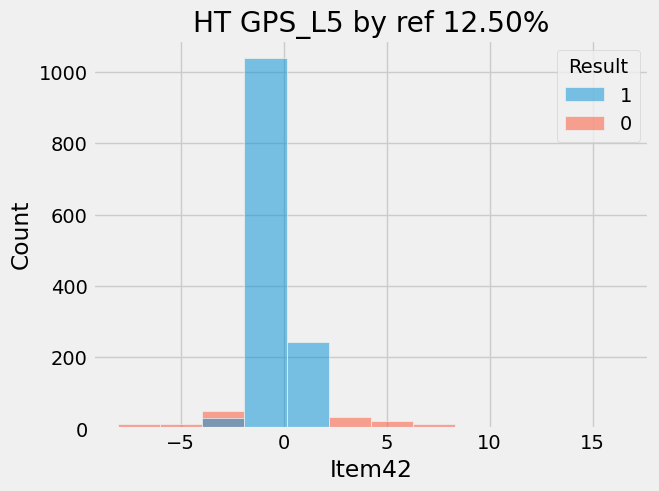

In [18]:
my_hisplot(raw,17801,42,-20, 'HT GPS_L5 by ref 12.50%');

ppk

In [26]:
ppk_df(raw,17801,42).describe()

count    1310.000000
mean       -0.001053
std         0.733215
min        -2.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.990000
Name: Item42, dtype: float64

In [28]:
ppk_result(ppk_df(raw,17801,42), upper=2, lower=-2)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(0.9092376263082009,
 0.9087587148867103,
 (-2.7506096871482097, 2.7485028169192023))

# FT1 L1+L5 by ref

sns

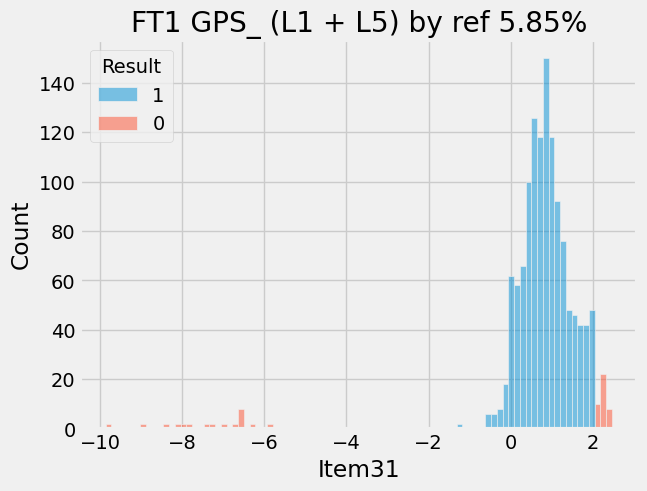

In [31]:
my_hisplot(raw,17802,31,-20, 'FT1 GPS_ (L1 + L5) by ref 5.85%');

<AxesSubplot: xlabel='Bezel', ylabel='Item31'>

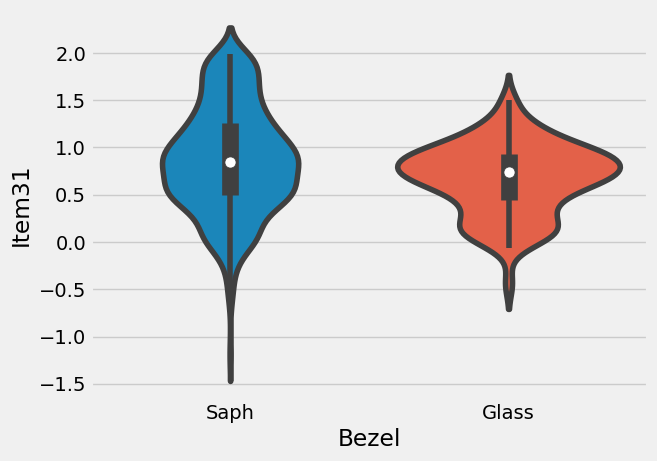

In [29]:
sns.violinplot(
data = tweak_df(raw,17802,31,-20).query('Result==True'),
x='Bezel',
y='Item31'
)

ppk

In [33]:
ppk_df(raw,17802,31).agg(['max','min'])

max    1.990001
min   -1.189998
Name: Item31, dtype: float64

In [35]:
ppk_result(ppk_df(raw,17802,31), upper=2, lower=-2)

shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits
shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(1.2214969971654128,
 0.7065248053476183,
 (-1.2034868851710638, 2.889851053115254))

# FT2 ANT

sns

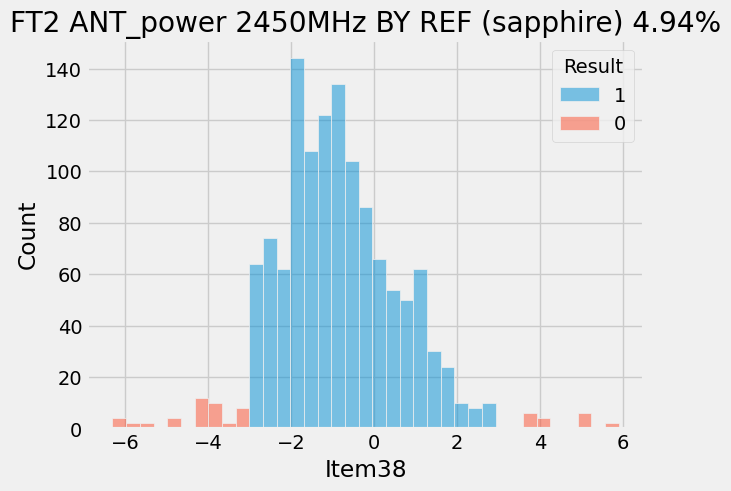

In [37]:
my_hisplot(raw,17803,38,-10, 'FT2 ANT_power 2450MHz BY REF (sapphire) 4.94%');

ppk

In [39]:
ppk_df(raw,17803,38).agg(['max','min'])

max    2.9
min   -3.0
Name: Item38, dtype: float64

In [41]:
ppk_result(ppk_df(raw,17803,38), upper=3, lower=-3)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(0.7824330022786438,
 0.5755057264284942,
 (-5.58614196336507, 3.999343283497083))